In [2]:
import ROOT
import torch
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import torch.nn as nn
import torchvision
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.optimize import curve_fit
torch.manual_seed(114514)

Welcome to JupyROOT 6.26/04


In [3]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [4]:
#construct the model
class custom1(nn.Module):
    def __init__(self, in_dim) -> None:
        super().__init__()
        self.input = nn.Linear(in_dim, 100)
        self.layer0 = nn.Linear(100, 75)
        self.layer1 = nn.Linear(75,75)
        self.layer2 = nn.Linear(75,50)
        self.output = nn.Linear(50, 1)

    def forward(self, x):
        x = nn.ReLU()(self.input(x))
        x = nn.Tanh()(self.layer0(x))
        x = nn.ReLU()(self.layer1(x))
        x = nn.Dropout(p=0.4)(x)
        x = nn.ReLU()(self.layer2(x))
        output = nn.Sigmoid()(self.output(x))
        return output


In [5]:
#loading dataset for training
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.RandomHorizontalFlip]
)

b_jet = (pd.read_csv("/global/cscratch1/sd/ricardom/b_jet.csv")).to_numpy()
c_jet = (pd.read_csv("/global/cscratch1/sd/ricardom/c_jet.csv")).to_numpy()
data_X = np.concatenate((b_jet, c_jet)) #data
#creating label for c_jet and b_jet: c -> 1, b -> 0
b_label = np.zeros((b_jet.shape[0]))
c_label = np.ones((c_jet.shape[0]))
data_y = np.concatenate((b_label, c_label)) #label for data

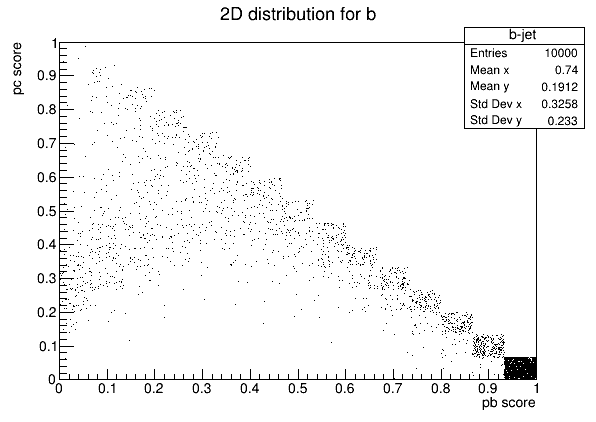

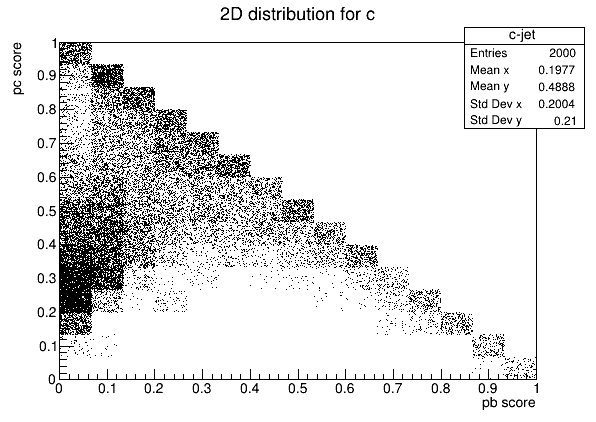

In [6]:
#plot 2d distribution for each jet with 1e4 scales of sample
num = int(1e4)
b = ROOT.TCanvas("b-jet {}".format(num),"The Canvas Title",600,450)
b_2D = ROOT.TH2F("b-jet", "2D distribution for b", 15, 0, 1, 15, 0, 1)
b_2D.FillN(num, b_jet[:, 0], b_jet[:, 1], 1/num*np.ones(num))
b_2D.Draw()
b.cd()
b_2D.GetYaxis().SetTitle("pc score")
b_2D.GetXaxis().SetTitle("pb score")
b.Draw()


num = int((1e4)/5)
c = ROOT.TCanvas("c-jet {}".format(num),"The Canvas Title",600,450)
c_2D = ROOT.TH2F("c-jet", "2D distribution for c", 15, 0, 1, 15, 0, 1)
c_2D.FillN(num, c_jet[:, 0], c_jet[:, 1], 1/num*np.ones(num))
c_2D.Draw()
c.cd()
c_2D.GetYaxis().SetTitle("pc score")
c_2D.GetXaxis().SetTitle("pb score")
c.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).


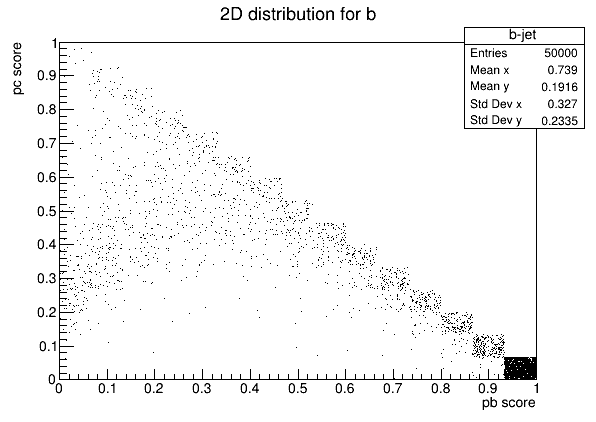

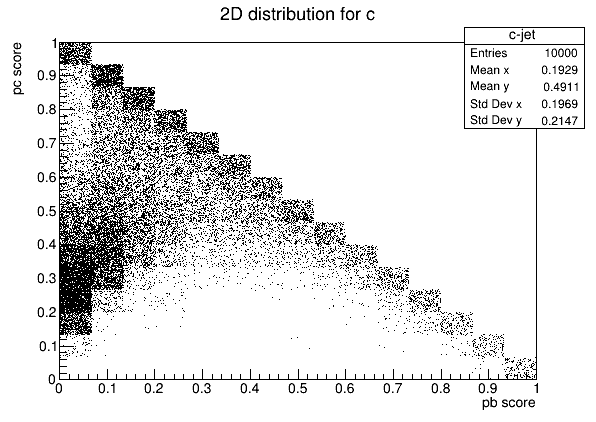

In [7]:
#plot 2d distribution for each jet with 5e4 scales of sample
num = int(5e4)
b = ROOT.TCanvas("b-jet {}".format(num),"The Canvas Title",600,450)
b_2D = ROOT.TH2F("b-jet", "2D distribution for b", 15, 0, 1, 15, 0, 1)
b_2D.FillN(num, b_jet[:, 0], b_jet[:, 1], 1/num*np.ones(num))
b_2D.Draw()
b.cd()
b_2D.GetYaxis().SetTitle("pc score")
b_2D.GetXaxis().SetTitle("pb score")
b.Draw()


num = int((5e4)/5)
c = ROOT.TCanvas("c-jet {}".format(num),"The Canvas Title",600,450)
c_2D = ROOT.TH2F("c-jet", "2D distribution for c", 15, 0, 1, 15, 0, 1)
c_2D.FillN(num, c_jet[:, 0], c_jet[:, 1], 1/num*np.ones(num))
c_2D.Draw()
c.cd()
c_2D.GetYaxis().SetTitle("pc score")
c_2D.GetXaxis().SetTitle("pb score")
c.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).


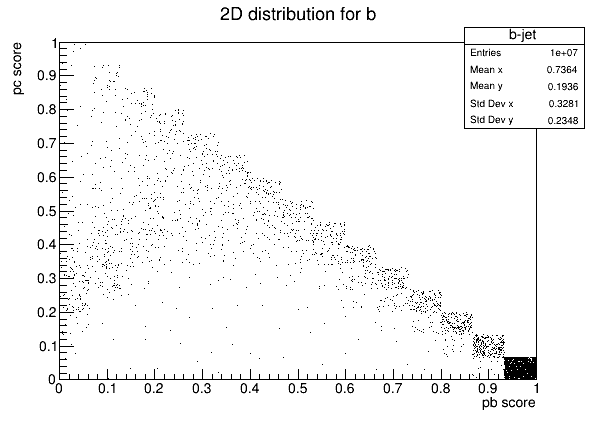

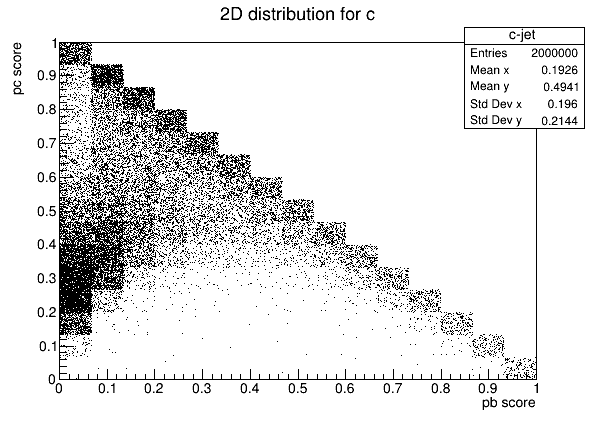

In [8]:
#plot 2d distribution for each jet with 1e5 scales of sample
num = int(1e7)
b = ROOT.TCanvas("b-jet {}".format(num),"The Canvas Title",600,450)
b_2D = ROOT.TH2F("b-jet", "2D distribution for b", 15, 0, 1, 15, 0, 1)
b_2D.FillN(num, b_jet[:, 0], b_jet[:, 1], 1/num*np.ones(num))
b_2D.Draw()
b.cd()
b_2D.GetYaxis().SetTitle("pc score")
b_2D.GetXaxis().SetTitle("pb score")
b.Draw()


num = int((1e7)/5)
c = ROOT.TCanvas("c-jet {}".format(num),"The Canvas Title",600,450)
c_2D = ROOT.TH2F("c-jet", "2D distribution for c", 15, 0, 1, 15, 0, 1)
c_2D.FillN(num, c_jet[:, 0], c_jet[:, 1], 1/num*np.ones(num))
c_2D.Draw()
c.cd()
c_2D.GetYaxis().SetTitle("pc score")
c_2D.GetXaxis().SetTitle("pb score")
c.Draw()


In [9]:
#train test split
X_t, X_test, y_t, y_test = train_test_split(data_X, data_y, test_size=10000000, random_state=114514)

In [ ]:
#train validation split
X_train_full, X_vali, y_train_full, y_vali = train_test_split(X_t, y_t, test_size=50000, random_state=114514)
print(y_vali.shape)

(50000,)


### Generate the baseline performance data

In [ ]:
#recompute baseline performance
y_baseline = y_test.reshape((y_test.shape[0], 1))
b_jet_test = X_test[y_baseline[:, 0] == 0]
c_jet_test = X_test[y_baseline[:, 0] == 1]

#Calculate ATLAS_score(ln(pc/pb))
b_ATLAS = np.log(np.divide(b_jet_test[:,1], b_jet_test[:,0]))
c_ATLAS = np.log(np.divide(c_jet_test[:,1], c_jet_test[:,0]))

#Calculate CMS_score(pc/(pc+pb))
b_CMS = np.divide(b_jet_test[:,1], b_jet_test[:, 0] + b_jet_test[:, 1])
c_CMS = np.divide(c_jet_test[:,1], c_jet_test[:, 0] + c_jet_test[:, 1])

#Caluculate only pc score
b_pc = b_jet_test[:,1]
c_pc = c_jet_test[:,1]

b_len, c_len = b_jet_test.shape[0], c_jet_test.shape[0] #The total number of each jet

#calculate efficiency for two discriminant method
#ATLAS-score
print(np.max(b_ATLAS), np.min(b_ATLAS), np.max(c_ATLAS), np.min(c_ATLAS))
thresh_ATLAS = np.linspace(-5.45, 3.85, 100)
b_eff_ATLAS = np.array([np.count_nonzero((b_ATLAS > thresh)) for thresh in thresh_ATLAS])/b_len
c_eff_ATLAS = np.array([np.count_nonzero((c_ATLAS > thresh)) for thresh in thresh_ATLAS])/c_len
b_rej_ATLAS = 1/b_eff_ATLAS
print(np.max(b_CMS), np.min(b_CMS), np.max(c_CMS), np.min(c_CMS))
thresh_CMS = np.linspace(0.01, 0.979, 100)
b_eff_CMS = np.array([np.count_nonzero((b_CMS > thresh)) for thresh in thresh_CMS])/b_len
c_eff_CMS = np.array([np.count_nonzero((c_CMS > thresh)) for thresh in thresh_CMS])/c_len
b_rej_CMS = 1/b_eff_CMS

print(np.max(b_pc), np.min(b_pc), np.max(c_pc), np.min(c_pc))
thresh_pc = np.linspace(0.0001, 0.99, 100)
b_eff_pc = np.array([np.count_nonzero((b_pc > thresh)) for thresh in thresh_pc])/b_len
c_eff_pc = np.array([np.count_nonzero((c_pc > thresh)) for thresh in thresh_pc])/c_len
b_rej_pc = 1/b_eff_pc

5.292378111198107 -18.84819027092911 5.780999400298741 -9.815904157698254
0.9949953874846685 6.521311848751205e-09 0.9969238617376472 5.457368599470575e-05
0.9948249 6.5213115e-09 0.99660987 5.4571436e-05


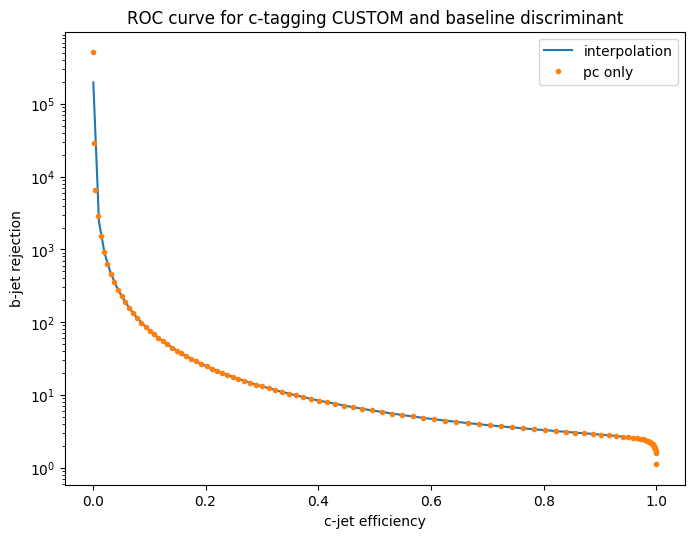

In [ ]:
from scipy.interpolate import interp1d

f_ATLAS = interp1d(c_eff_ATLAS, b_rej_ATLAS, kind = "slinear", fill_value = "extrapolate")
f_pc = interp1d(c_eff_pc, b_rej_pc, kind = "slinear", fill_value = "extrapolate")
f_CMS = interp1d(c_eff_CMS, b_rej_CMS, kind = "slinear", fill_value = "extrapolate")

x_space = np.linspace(0.001, 0.99, 100)
plt.figure(figsize=(8,6), dpi=100)

#plt.plot(c_eff_ATLAS, b_rej_ATLAS, ".", label = "ATLAS-like")
#plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.plot(x_space, f_pc(x_space), label = "interpolation")
plt.plot(c_eff_pc, b_rej_pc, ".", label = "pc only")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

In [ ]:
print(c_jet.shape[0]/(b_jet.shape[0]), b_jet.shape[0]/(b_jet.shape[0]+c_jet.shape[0]))


0.21509357492419073 0.8229818843889366


### Training with 10k samples

epoch = 20, batch size = 256, learning rate = 3e-4, <br>
optimizer: Adam, criterion: BCELoss; model name: model_10k, <br>
exponentially decaying learning rate with gamma = 0.9 <br>

In [ ]:
#prepare training dataset
torch.manual_seed(114514)
X_train, y_train = X_train_full[:10000, :], y_train_full[:10000]

dataset_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_vali = torch.utils.data.TensorDataset(torch.from_numpy(X_vali), torch.from_numpy(y_vali))

device = torch.device("cuda"  if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 2 #for this prototyping NN, only use pb and pc as the input features
model_10k = custom1(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model_10k.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size = batch_size, shuffle = True) 

train_accu_lst_10k, vali_accu_lst_10k = [], []
train_loss_lst_10k, vali_loss_lst_10k = [], []
model_10k.train()
for epoch in range(epochs):
    model_10k.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model_10k(X)
        #reconstruct criterion based on each data label
        #weight = torch.clone(y)
        #weight[weight[:, 0] == 0] = 0.21
        #criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst_10k.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model_10k.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model_10k(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model_10k.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst_10k.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model_10k.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model_10k(X)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model_10k.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst_10k.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst_10k.append(vali_accu)

device: cpu


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.6012129008769989
train accu: 0.5012459902119282
vali accu: 0.5018966586368405, vali loss: 0.49370234642101796


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.42523055970668794
train accu: 0.5004297050037341
vali accu: 0.5006410989712083, vali loss: 0.3773916041364475


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.3385586693882942


/global/homes/r/ricardom/.conda/envs/root_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1999: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


train accu: 0.781088315188692
vali accu: 0.7645453918118207, vali loss: 0.3128684692997105


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.30315164737403394
train accu: 0.8009130466323189
vali accu: 0.7877174012494194, vali loss: 0.3064811526968771


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.3019838988780975
train accu: 0.8016042351539175
vali accu: 0.7916543513531774, vali loss: 0.30533038102546517


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.29989900439977646
train accu: 0.7927692721180681
vali accu: 0.7820433080149096, vali loss: 0.30533968163084013


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.3066297687590122
train accu: 0.7892276003116504
vali accu: 0.7789802115226606, vali loss: 0.3052986828344209


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.2963544771075249
train accu: 0.7957534758416751
vali accu: 0.7840450595213053, vali loss: 0.30485793157499663


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.3002441607415676
train accu: 0.7951945019996123
vali accu: 0.7855203233331762, vali loss: 0.3040379637054035


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.2975284535437822
train accu: 0.7845112053150054
vali accu: 0.7783124934083645, vali loss: 0.303774105879117


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.2960991833359003
train accu: 0.7906396173610043
vali accu: 0.7895232275910574, vali loss: 0.30309675063709823


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.30015436820685865
train accu: 0.7909001924429124
vali accu: 0.7806187672708335, vali loss: 0.30200711645338


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.299389761313796
train accu: 0.7841211432554243
vali accu: 0.780606714991283, vali loss: 0.3026465181337327


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.3001580759882927
train accu: 0.7910459772365166
vali accu: 0.7813896532052208, vali loss: 0.30226721280083363


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.2961811013519764
train accu: 0.7896680741691455
vali accu: 0.7819216411036835, vali loss: 0.30278503233376813


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.3038175333291292
train accu: 0.790434801538207
vali accu: 0.7795979299943484, vali loss: 0.3017913036960728


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.29508110098540785
train accu: 0.7749310044976088
vali accu: 0.7775531016524538, vali loss: 0.30168728005825257


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.3002542607486248
train accu: 0.7871786606675114
vali accu: 0.7846003981930044, vali loss: 0.30146978156907217


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.3093396995216608
train accu: 0.7907061777215668
vali accu: 0.781004658133495, vali loss: 0.3020896338382546


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.3006918586790562
train accu: 0.7931440078949329
vali accu: 0.7792532957147279, vali loss: 0.30130966425854333


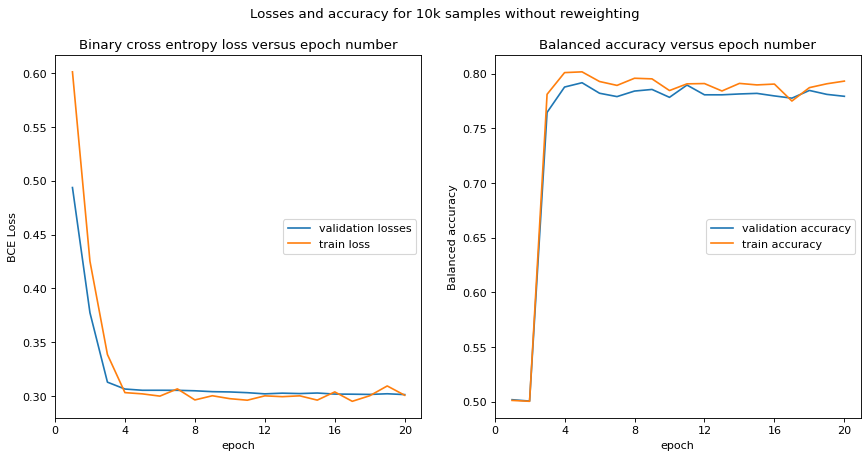

In [ ]:
#plot the loss and accuracy versus epoch
epochs = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(13,6), dpi=80)
fig.suptitle("Losses and accuracy for 10k samples without reweighting")
ax[0].plot(epochs, vali_loss_lst_10k, label = "validation losses")
ax[0].plot(epochs, train_loss_lst_10k, label = "train loss")
ax[0].set_ylabel("BCE Loss")
ax[0].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[0].set_title("Binary cross entropy loss versus epoch number")
ax[0].legend(loc=5)

ax[1].plot(epochs, vali_accu_lst_10k, label = "validation accuracy")
ax[1].plot(epochs, train_accu_lst_10k, label = "train accuracy")
ax[1].set_ylabel("Balanced accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_xticks(np.arange(0,21,4))
ax[1].set_title("Balanced accuracy versus epoch number")
ax[1].legend(loc=5)
plt.show()


In [ ]:
#Make prediction on test set with model_10k:
dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred_10k = []
with torch.no_grad():
    model_10k.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model_10k(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred_10k.append(result)

pred_label_10k = np.concatenate(pred_10k)
print(pred_label_10k.shape)
    

  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)


In [ ]:
b_CUSTOM1_10k = pred_label_10k[pred_label_10k[:, 1] == 0]
c_CUSTOM1_10k = pred_label_10k[pred_label_10k[:, 1] == 1]
b_len, c_len = b_CUSTOM1_10k.shape[0], c_CUSTOM1_10k.shape[0]
print(np.max(b_CUSTOM1_10k[:,0]), np.min(b_CUSTOM1_10k[:,0]), np.max(c_CUSTOM1_10k[:,0]), np.min(c_CUSTOM1_10k[:,0]))

thresh_CUSTOM1_10k = np.linspace(0.01, 0.67, 100)
b_eff_CUSTOM1_10k = np.array([np.count_nonzero((b_CUSTOM1_10k[:, 0] > thresh)) for thresh in thresh_CUSTOM1_10k])/b_len
c_eff_CUSTOM1_10k = np.array([np.count_nonzero((c_CUSTOM1_10k[:, 0] > thresh)) for thresh in thresh_CUSTOM1_10k])/c_len
b_rej_CUSTOM1_10k = 1/b_eff_CUSTOM1_10k

0.6795461 0.00045568086 0.68349 0.000714733


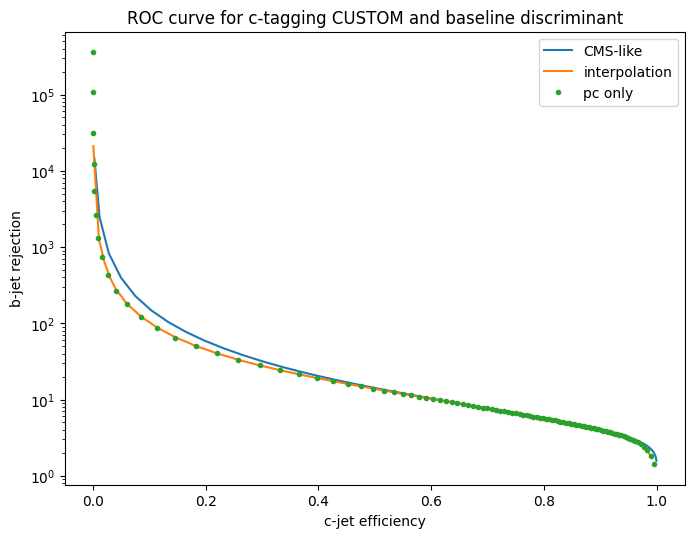

In [ ]:
f_custom1_10k = interp1d(c_eff_CUSTOM1_10k, b_rej_CUSTOM1_10k, kind = "slinear", fill_value = "extrapolate")
x_space = np.linspace(0.001, 0.99, 100)
plt.figure(figsize=(8,6), dpi=100)

#plt.plot(c_eff_ATLAS, b_rej_ATLAS, ".", label = "ATLAS-like")
plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.plot(x_space, f_custom1_10k(x_space), label = "interpolation")
plt.plot(c_eff_CUSTOM1_10k, b_rej_CUSTOM1_10k, ".", label = "pc only")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

### Training with 10k samples with reweighting

In [ ]:
#prepare training dataset
torch.manual_seed(114514)
X_train, y_train = X_train_full[:10000, :], y_train_full[:10000]

dataset_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_vali = torch.utils.data.TensorDataset(torch.from_numpy(X_vali), torch.from_numpy(y_vali))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 2 #for this prototyping NN, only use pb and pc as the input features
model_10k_rw = custom1(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model_10k_rw.parameters(), lr = learning_rate)
#criterion = nn.BCELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size = batch_size, shuffle = True) 

train_accu_lst_10k_rw, vali_accu_lst_10k_rw = [], []
train_loss_lst_10k_rw, vali_loss_lst_10k_rw = [], []
model_10k_rw.train()
for epoch in range(epochs):
    model_10k_rw.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model_10k_rw(X)
        #reconstruct criterion based on each data label
        weight = torch.clone(y)
        weight[weight[:, 0] == 0] = 0.21
        criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst_10k_rw.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model_10k_rw.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model_10k_rw(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model_10k_rw.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst_10k_rw.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model_10k_rw.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model_10k_rw(X)
            weight = torch.clone(y)
            weight[weight[:, 0] == 0] = 0.21
            criterion = nn.BCELoss(weight = weight)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model_10k_rw.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst_10k_rw.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst_10k_rw.append(vali_accu)

device: cpu


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.23211189955472947
train accu: 0.519367871105524
vali accu: 0.5186783476740698, vali loss: 0.21695900936515963


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.18561050482094288
train accu: 0.8193091040589682
vali accu: 0.8184048001532075, vali loss: 0.15504984588039164


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.14842600300908088


/global/homes/r/ricardom/.conda/envs/root_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1999: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


train accu: 0.824593403015556
vali accu: 0.8232367823077277, vali loss: 0.14436615547355341


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.1438014106824994
train accu: 0.8258104507324024
vali accu: 0.8219161191004641, vali loss: 0.14408690706655689


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.14259683135896922
train accu: 0.8241253784600693
vali accu: 0.8221931974013902, vali loss: 0.1435091649087108


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.1419117271900177
train accu: 0.8278104321291835
vali accu: 0.8229915569402797, vali loss: 0.14330557764184718


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.14539633225649595
train accu: 0.8229816367275224
vali accu: 0.823490873549729, vali loss: 0.14327573574775335


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.1408995040692389
train accu: 0.8248093228073948
vali accu: 0.8197482000692174, vali loss: 0.14299411170792822


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.14088396448642015
train accu: 0.8226527138538161
vali accu: 0.8230127883244541, vali loss: 0.1425133720420453


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.14052969124168158
train accu: 0.824343827186372
vali accu: 0.822940779502595, vali loss: 0.14211855847768637


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.14036532770842314
train accu: 0.8193427343767119
vali accu: 0.8223966785763945, vali loss: 0.14176078174947476


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.1418164435774088
train accu: 0.8236180665110264
vali accu: 0.8205052111305018, vali loss: 0.14163502583242193


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.14053664319217204
train accu: 0.8154185427597211
vali accu: 0.8222954764490106, vali loss: 0.14113129283852724


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.14399735424667598
train accu: 0.8231050203465117
vali accu: 0.8220403964199561, vali loss: 0.1410703108626969


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.14017138741910457
train accu: 0.8271255820305685
vali accu: 0.8217408371175249, vali loss: 0.14161598097000802


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.14348142836242914
train accu: 0.8231186877916727
vali accu: 0.8220756032234295, vali loss: 0.1410128509967911


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.1393443899229169
train accu: 0.8266357645414196
vali accu: 0.8224234914844492, vali loss: 0.14106205485913217


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.14149925522506238
train accu: 0.8243620311905747
vali accu: 0.8222955215700319, vali loss: 0.14094511674222898


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.14505101311951876
train accu: 0.8257981696384172
vali accu: 0.821519233853834, vali loss: 0.14115190810086775


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.14246753752231597
train accu: 0.8255188582520461
vali accu: 0.8214936805616608, vali loss: 0.14136689353962334


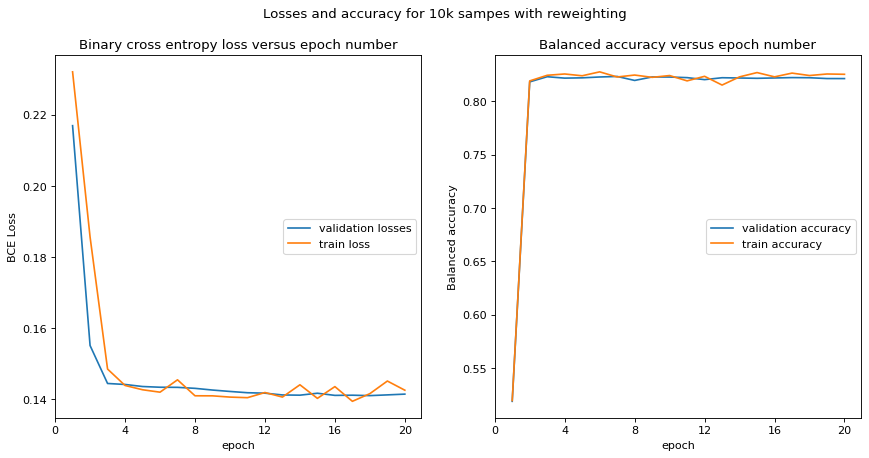

In [ ]:
#plot the loss and accuracy versus epoch
epochs = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(13,6), dpi=80)
fig.suptitle("Losses and accuracy for 10k sampes with reweighting")
ax[0].plot(epochs, vali_loss_lst_10k_rw, label = "validation losses")
ax[0].plot(epochs, train_loss_lst_10k_rw, label = "train loss")
ax[0].set_ylabel("BCE Loss")
ax[0].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[0].set_title("Binary cross entropy loss versus epoch number")
ax[0].legend(loc=5)

ax[1].plot(epochs, vali_accu_lst_10k_rw, label = "validation accuracy")
ax[1].plot(epochs, train_accu_lst_10k_rw, label = "train accuracy")
ax[1].set_ylabel("Balanced accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_xticks(np.arange(0,21,4))
ax[1].set_title("Balanced accuracy versus epoch number")
ax[1].legend(loc=5)
plt.show()

In [ ]:
#Make prediction on test set with model_10k:
dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred_10k_rw = []
with torch.no_grad():
    model_10k_rw.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model_10k_rw(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred_10k_rw.append(result)

pred_label_10k_rw = np.concatenate(pred_10k_rw)
print(pred_label_10k_rw.shape)


  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)


In [ ]:
b_CUSTOM1_10k_rw = pred_label_10k_rw[pred_label_10k_rw[:, 1] == 0]
c_CUSTOM1_10k_rw = pred_label_10k_rw[pred_label_10k_rw[:, 1] == 1]
b_len, c_len = b_CUSTOM1_10k_rw.shape[0], c_CUSTOM1_10k_rw.shape[0]
print(np.max(b_CUSTOM1_10k_rw[:,0]), np.min(b_CUSTOM1_10k_rw[:,0]), np.max(c_CUSTOM1_10k_rw[:,0]), np.min(c_CUSTOM1_10k_rw[:,0]))

thresh_CUSTOM1_10k_rw = np.linspace(0.01, 0.96, 100)
b_eff_CUSTOM1_10k_rw = np.array([np.count_nonzero((b_CUSTOM1_10k_rw[:, 0] > thresh)) for thresh in thresh_CUSTOM1_10k_rw])/b_len
c_eff_CUSTOM1_10k_rw = np.array([np.count_nonzero((c_CUSTOM1_10k_rw[:, 0] > thresh)) for thresh in thresh_CUSTOM1_10k_rw])/c_len
b_rej_CUSTOM1_10k_rw = 1/b_eff_CUSTOM1_10k_rw

0.96117043 0.0035739988 0.96632797 0.005957309


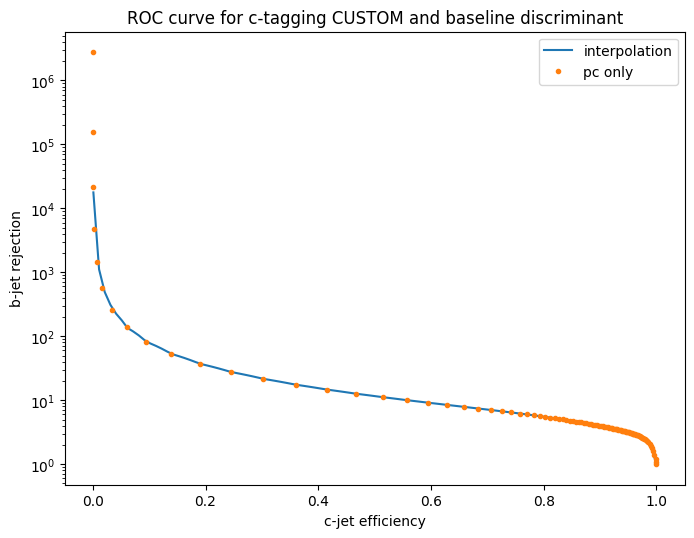

In [ ]:
f_custom1_10k_rw = interp1d(c_eff_CUSTOM1_10k_rw, b_rej_CUSTOM1_10k_rw, kind = "slinear", fill_value= "extrapolate")
x_space = np.linspace(0.001, 0.9999, 100)
plt.figure(figsize=(8,6), dpi=100)

#plt.plot(c_eff_ATLAS, b_rej_ATLAS, ".", label = "ATLAS-like")
#plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.plot(x_space, f_custom1_10k_rw(x_space), label = "interpolation")
plt.plot(c_eff_CUSTOM1_10k_rw, b_rej_CUSTOM1_10k_rw, ".", label = "pc only")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

### Draw roc curve to see the performance

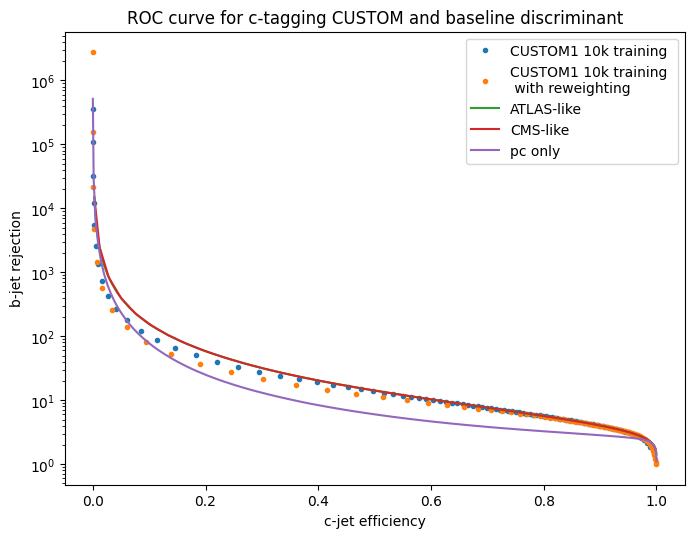

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(c_eff_CUSTOM1_10k, b_rej_CUSTOM1_10k, ".", label = "CUSTOM1 10k training")
plt.plot(c_eff_CUSTOM1_10k_rw, b_rej_CUSTOM1_10k_rw, ".", label = "CUSTOM1 10k training \n with reweighting")
#plt.plot(c_eff_CUSTOM1_100k, b_rej_CUSTOM1_100k, ".", label = "CUSTOM1 100k training \n with reweighting")
plt.plot(c_eff_ATLAS, b_rej_ATLAS,  label = "ATLAS-like")
plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.plot(c_eff_pc, b_rej_pc, label = "pc only")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

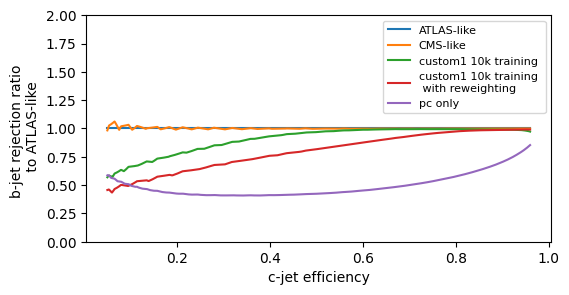

In [ ]:
### draw ratio plot
x_space = np.linspace(0.05, 0.96, 1000)
y_ATLAS, y_CMS = f_ATLAS(x_space), f_CMS(x_space)
y_1_10k, y_1_10k_rw = f_custom1_10k(x_space), f_custom1_10k_rw(x_space)
y_pc = f_pc(x_space)
plt.figure(figsize=(6,3), dpi=100)
plt.plot(x_space, y_ATLAS/y_ATLAS, label = "ATLAS-like")
plt.plot(x_space, y_CMS/y_ATLAS, label = "CMS-like")
plt.plot(x_space, y_1_10k/y_ATLAS, label = "custom1 10k training")
plt.plot(x_space, y_1_10k_rw/y_ATLAS, label = "custom1 10k training \n with reweighting")
plt.plot(x_space, y_pc/y_ATLAS, label = "pc only")

#plt.yscale("log", base = 10)
plt.ylim(0,2)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection ratio \n to ATLAS-like")
plt.legend(prop={'size': 8})
plt.show()

### Training with 100k samples

In [ ]:
#prepare training dataset
torch.manual_seed(114514)
X_train, y_train = X_train_full[10000:110000, :], y_train_full[10000:110000]

dataset_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_vali = torch.utils.data.TensorDataset(torch.from_numpy(X_vali), torch.from_numpy(y_vali))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 2 #for this prototyping NN, only use pb and pc as the input features
model_100k = custom1(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model_100k.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size = batch_size, shuffle = True) 

train_accu_lst_100k, vali_accu_lst_100k = [], []
train_loss_lst_100k, vali_loss_lst_100k = [], []
model_100k.train()
for epoch in range(epochs):
    model_100k.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model_100k(X)
        #reconstruct criterion based on each data label
        #weight = torch.clone(y)
        #weight[weight[:, 0] == 0] = 0.21
        #criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst_100k.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model_100k.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model_100k(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model_100k.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst_100k.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model_100k.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model_100k(X)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model_100k.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst_100k.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst_100k.append(vali_accu)

device: cpu


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.34633934093863156
train accu: 0.7825133652594262
vali accu: 0.7793692354550266, vali loss: 0.30051178485155106


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.2972676770004165
train accu: 0.773614600026546
vali accu: 0.770341871721258, vali loss: 0.2978198402846346


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.29517230071375133
train accu: 0.7721886811704984
vali accu: 0.7698326179310769, vali loss: 0.29721529112786665


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.29466636555121684
train accu: 0.7539656469831851
vali accu: 0.7509529843935345, vali loss: 0.2974013441375324


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.29431507479199365
train accu: 0.7686026824629716
vali accu: 0.765814984164715, vali loss: 0.2951799813581973


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.29405487220153176
train accu: 0.766110660319001
vali accu: 0.7634081241993845, vali loss: 0.2948949730061755


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.29340358272842737
train accu: 0.7610969820360393
vali accu: 0.7586668539996804, vali loss: 0.2950909417502734


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.29333774177619565
train accu: 0.7343657873204646
vali accu: 0.7306945646157806, vali loss: 0.2968208975329691


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.29316368779105606
train accu: 0.7649683418544723
vali accu: 0.7619264463544297, vali loss: 0.29478672207618245


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.2929605035220875
train accu: 0.7648521192198994
vali accu: 0.7597484517735326, vali loss: 0.29452312129492664


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.2926430470498322
train accu: 0.7639755912159567
vali accu: 0.7588727437902956, vali loss: 0.2948060878077332


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.2926517370183145
train accu: 0.7556472355071673
vali accu: 0.7512273610088057, vali loss: 0.2946987139175133


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.29247429570578554
train accu: 0.7586875270219998
vali accu: 0.7555541292474225, vali loss: 0.2946182715953613


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.29225413264978267
train accu: 0.7673226132332109
vali accu: 0.7638022469498905, vali loss: 0.294487968923486


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.29247939155992037
train accu: 0.7616355299492169
vali accu: 0.7573260018271842, vali loss: 0.29462351224252153


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.29231868562338603
train accu: 0.7605210408306207
vali accu: 0.7551916161156025, vali loss: 0.29432705341249094


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.29217466887305765
train accu: 0.7577191116264149
vali accu: 0.7547666572622469, vali loss: 0.29456356144985374


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.29224010013863255
train accu: 0.7587309900055531
vali accu: 0.7550232698570385, vali loss: 0.29421042415256404


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.2922047638832151
train accu: 0.7609004864315987
vali accu: 0.7557845353912247, vali loss: 0.2943303527272477


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.2919901218408209
train accu: 0.7626282494851597
vali accu: 0.7585548583436327, vali loss: 0.2940148061939648


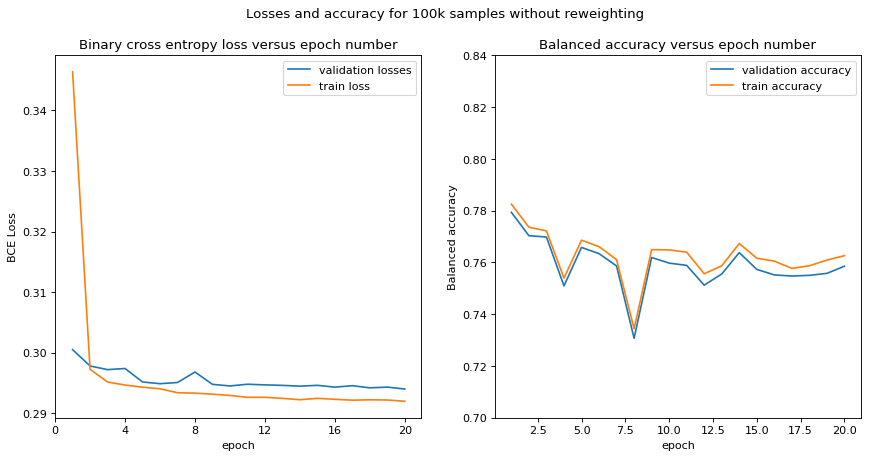

In [ ]:
#plot the loss and accuracy versus epoch
epochs = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(13,6), dpi=80)
fig.suptitle("Losses and accuracy for 100k samples without reweighting")
ax[0].plot(epochs, vali_loss_lst_100k, label = "validation losses")
ax[0].plot(epochs, train_loss_lst_100k, label = "train loss")
ax[0].set_ylabel("BCE Loss")
ax[0].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[0].set_title("Binary cross entropy loss versus epoch number")
ax[0].legend(loc=1)

ax[1].plot(epochs, vali_accu_lst_100k, label = "validation accuracy")
ax[1].plot(epochs, train_accu_lst_100k, label = "train accuracy")
ax[1].set_ylabel("Balanced accuracy")
ax[1].set_ylim(0.7, 0.84)
ax[1].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[1].set_title("Balanced accuracy versus epoch number")
ax[1].legend(loc=1)
plt.show()


In [ ]:
#Make prediction on test set with model_100k:
_, X_test, _, y_test = train_test_split(data_X, data_y, test_size=10000000, random_state=114514)
dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred_100k = []
with torch.no_grad():
    model_100k.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model_100k(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred_100k.append(result)

pred_label_100k = np.concatenate(pred_100k)
print(pred_label_100k.shape)

  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)


In [ ]:
b_CUSTOM1_100k = pred_label_100k[pred_label_100k[:, 1] == 0]
c_CUSTOM1_100k = pred_label_100k[pred_label_100k[:, 1] == 1]
b_len, c_len = b_CUSTOM1_100k.shape[0], c_CUSTOM1_100k.shape[0]
print(np.max(b_CUSTOM1_100k[:,0]), np.min(b_CUSTOM1_100k[:,0]), np.max(c_CUSTOM1_100k[:,0]), np.min(c_CUSTOM1_100k[:,0]))

thresh_CUSTOM1_100k = np.linspace(0.01, 0.89, 100)
b_eff_CUSTOM1_100k = np.array([np.count_nonzero((b_CUSTOM1_100k[:, 0] > thresh)) for thresh in thresh_CUSTOM1_100k])/b_len
c_eff_CUSTOM1_100k = np.array([np.count_nonzero((c_CUSTOM1_100k[:, 0] > thresh)) for thresh in thresh_CUSTOM1_100k])/c_len
b_rej_CUSTOM1_100k = 1/b_eff_CUSTOM1_100k

0.8958204 3.5536792e-05 0.915384 0.00014127496


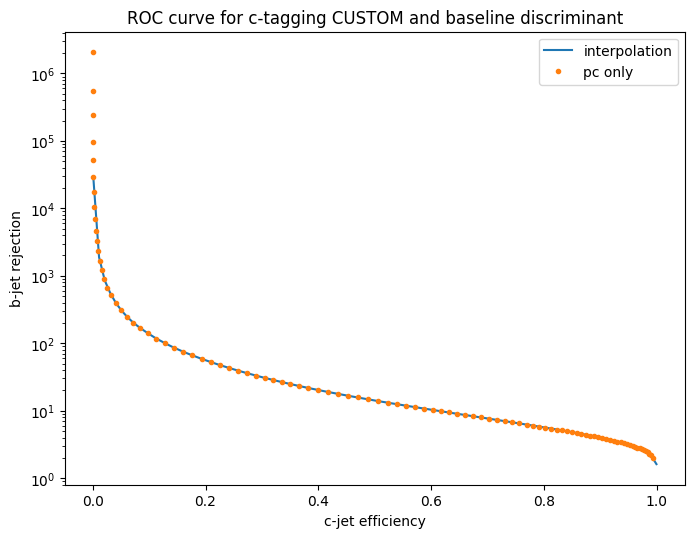

In [ ]:
f_custom1_100k = interp1d(c_eff_CUSTOM1_100k, b_rej_CUSTOM1_100k, kind = "slinear", fill_value= "extrapolate")
x_space = np.linspace(0.001, 0.9999, 100)
plt.figure(figsize=(8,6), dpi=100)

#plt.plot(c_eff_ATLAS, b_rej_ATLAS, ".", label = "ATLAS-like")
#plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.plot(x_space, f_custom1_100k(x_space), label = "interpolation")
plt.plot(c_eff_CUSTOM1_100k, b_rej_CUSTOM1_100k, ".", label = "pc only")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

### Training with 100k sample with reweighting

In [ ]:
#prepare training dataset
torch.manual_seed(114514)
X_train, y_train = X_train_full[10000:110000, :], y_train_full[10000:110000]

dataset_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_vali = torch.utils.data.TensorDataset(torch.from_numpy(X_vali), torch.from_numpy(y_vali))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 2 #for this prototyping NN, only use pb and pc as the input features
model_100k_rw = custom1(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model_100k_rw.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size = batch_size, shuffle = True) 

train_accu_lst_100k_rw, vali_accu_lst_100k_rw = [], []
train_loss_lst_100k_rw, vali_loss_lst_100k_rw = [], []
model_100k_rw.train()
for epoch in range(epochs):
    model_100k_rw.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model_100k_rw(X)
        #reconstruct criterion based on each data label
        weight = torch.clone(y)
        weight[weight[:, 0] == 0] = 0.21
        criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    #scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst_100k_rw.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model_100k_rw.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model_100k_rw(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model_100k_rw.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst_100k_rw.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model_100k_rw.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model_100k_rw(X)
            weight = torch.clone(y)
            weight[weight[:, 0] == 0] = 0.21
            criterion = nn.BCELoss(weight = weight)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model_100k_rw.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst_100k_rw.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst_100k_rw.append(vali_accu)

device: cpu


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.15473673591757064
train accu: 0.8204153162343043
vali accu: 0.8200926395904038, vali loss: 0.14057501869238154


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.1384565016955061
train accu: 0.8171681101984569
vali accu: 0.8165699668828462, vali loss: 0.13868942153545058


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.13719648124692996
train accu: 0.8184708339225752
vali accu: 0.8165856083997636, vali loss: 0.13796869604563228


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.13670379150172937
train accu: 0.8188324403610288
vali accu: 0.8187313872273133, vali loss: 0.1380765477613527


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.1364300374865837
train accu: 0.8165979596004008
vali accu: 0.815619073642086, vali loss: 0.13651422882566647


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.13608155725404736
train accu: 0.8173251103321642
vali accu: 0.8154046701098286, vali loss: 0.13630641841006522


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.135731421563479
train accu: 0.8188708232011793
vali accu: 0.8169727534972737, vali loss: 0.13608183601529014


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.13565656117847202
train accu: 0.8185378215997213
vali accu: 0.8173030268647353, vali loss: 0.13608744117070218


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.13543946598954212
train accu: 0.8179242245107952
vali accu: 0.8176904342507675, vali loss: 0.1362337832700233


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.13522792354111782
train accu: 0.8219341218994984
vali accu: 0.8205129030373672, vali loss: 0.13589792345099302


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.13528943972666854
train accu: 0.8219612593988838
vali accu: 0.8199283268123031, vali loss: 0.13561363404198568


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.13534574715606393
train accu: 0.8195555804100799
vali accu: 0.8186128280811298, vali loss: 0.13563460544968137


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.13516848339982654
train accu: 0.8209836563852584
vali accu: 0.8206340610974104, vali loss: 0.1361089503126485


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.1351129049649629
train accu: 0.8186392882857265
vali accu: 0.8179556502936323, vali loss: 0.13580838332370837


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.13488823188768934
train accu: 0.8213564179441926
vali accu: 0.8185388772993842, vali loss: 0.13580529315739262


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.13495501001244006
train accu: 0.821870939859538
vali accu: 0.8203626067113003, vali loss: 0.13554296699561635


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.13504185432287127
train accu: 0.8181388286131268
vali accu: 0.8168917934439852, vali loss: 0.1354253885849398


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.1349780083922169
train accu: 0.8180858517839522
vali accu: 0.8175538694236744, vali loss: 0.13544550975214462


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.1348290770026424
train accu: 0.8204411183092278
vali accu: 0.8200371575977623, vali loss: 0.13532500254104332


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.1349346678313392
train accu: 0.8180218063570294
vali accu: 0.8171116923673849, vali loss: 0.13583055172799802


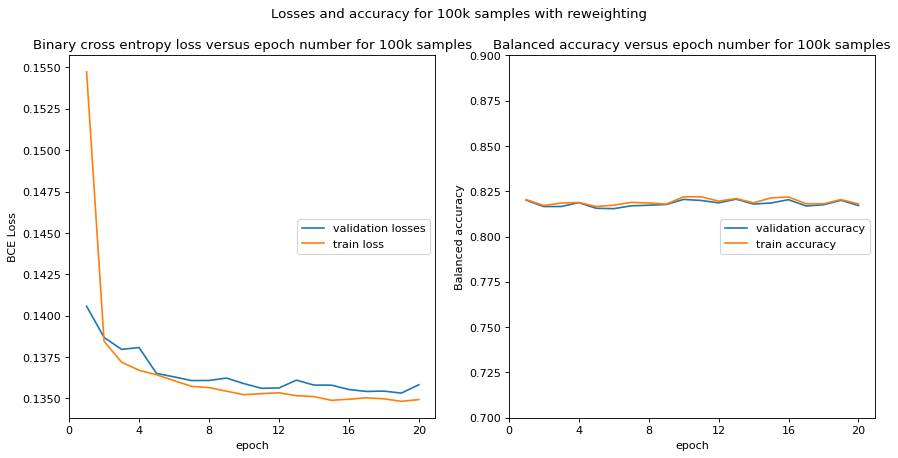

In [ ]:
#plot the loss and accuracy versus epoch
epochs = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(13,6), dpi=80)
fig.suptitle("Losses and accuracy for 100k samples with reweighting")
ax[0].plot(epochs, vali_loss_lst_100k_rw, label = "validation losses")
ax[0].plot(epochs, train_loss_lst_100k_rw, label = "train loss")
ax[0].set_ylabel("BCE Loss")
ax[0].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[0].set_title("Binary cross entropy loss versus epoch number for 100k samples")
ax[0].legend(loc=5)

ax[1].plot(epochs, vali_accu_lst_100k_rw, label = "validation accuracy")
ax[1].plot(epochs, train_accu_lst_100k_rw, label = "train accuracy")
ax[1].set_ylim(0.7, 0.9)
ax[1].set_ylabel("Balanced accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_xticks(np.arange(0,21,4))
ax[1].set_title("Balanced accuracy versus epoch number for 100k samples")
ax[1].legend(loc=5)
plt.show()

In [ ]:
#Make prediction on test set with model_100k:
_, X_test, _, y_test = train_test_split(data_X, data_y, test_size=10000000, random_state=114514)
dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred_100k_rw = []
with torch.no_grad():
    model_100k_rw.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model_100k_rw(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred_100k_rw.append(result)

pred_label_100k_rw = np.concatenate(pred_100k_rw)
print(pred_label_100k_rw.shape)

  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)


In [ ]:
b_CUSTOM1_100k_rw = pred_label_100k_rw[pred_label_100k_rw[:, 1] == 0]
c_CUSTOM1_100k_rw = pred_label_100k_rw[pred_label_100k_rw[:, 1] == 1]
b_len, c_len = b_CUSTOM1_100k_rw.shape[0], c_CUSTOM1_100k_rw.shape[0]
print(np.max(b_CUSTOM1_100k_rw[:,0]), np.min(b_CUSTOM1_100k_rw[:,0]), np.max(c_CUSTOM1_100k_rw[:,0]), np.min(c_CUSTOM1_100k_rw[:,0]))

thresh_CUSTOM1_100k_rw = np.linspace(0.01, 0.98, 100)
b_eff_CUSTOM1_100k_rw = np.array([np.count_nonzero((b_CUSTOM1_100k_rw[:, 0] > thresh)) for thresh in thresh_CUSTOM1_100k_rw])/b_len
c_eff_CUSTOM1_100k_rw = np.array([np.count_nonzero((c_CUSTOM1_100k_rw[:, 0] > thresh)) for thresh in thresh_CUSTOM1_100k_rw])/c_len
b_rej_CUSTOM1_100k_rw = 1/b_eff_CUSTOM1_100k_rw

0.9819355 0.00045350767 0.98535734 0.0014094065


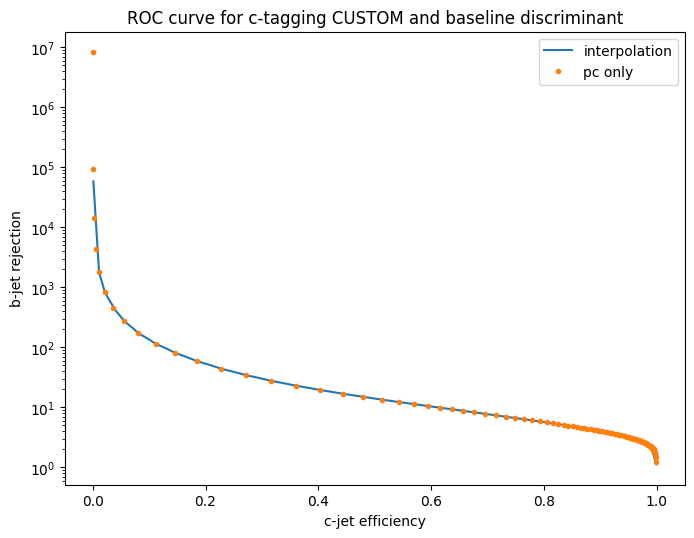

In [ ]:
f_custom1_100k_rw = interp1d(c_eff_CUSTOM1_100k_rw, b_rej_CUSTOM1_100k_rw, kind = "slinear", fill_value= "extrapolate")
x_space = np.linspace(0.001, 0.9999, 100)
plt.figure(figsize=(8,6), dpi=100)

#plt.plot(c_eff_ATLAS, b_rej_ATLAS, ".", label = "ATLAS-like")
#plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.plot(x_space, f_custom1_100k_rw(x_space), label = "interpolation")
plt.plot(c_eff_CUSTOM1_100k_rw, b_rej_CUSTOM1_100k_rw, ".", label = "pc only")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

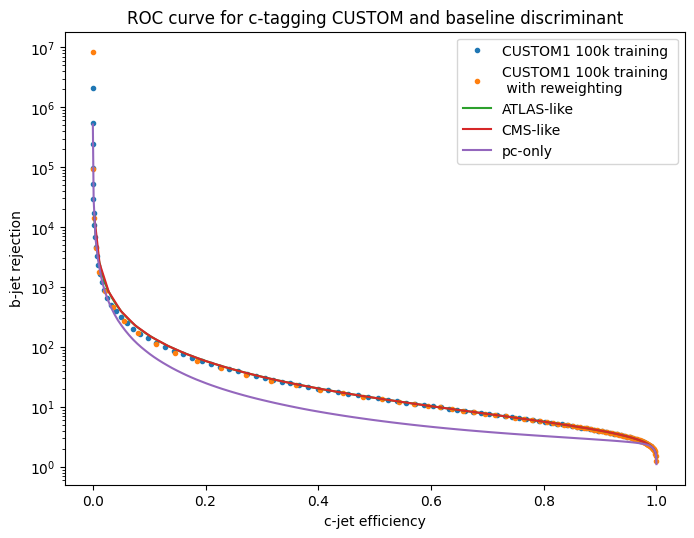

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(c_eff_CUSTOM1_100k, b_rej_CUSTOM1_100k, ".", label = "CUSTOM1 100k training")
plt.plot(c_eff_CUSTOM1_100k_rw, b_rej_CUSTOM1_100k_rw, ".", label = "CUSTOM1 100k training \n with reweighting")
#plt.plot(c_eff_CUSTOM1_100k, b_rej_CUSTOM1_100k, ".", label = "CUSTOM1 100k training \n with reweighting")
#plt.plot(c_eff_CUSTOM1w, b_rej_CUSTOM1w, label = "CUSTOM1 without reweighting")
plt.plot(c_eff_ATLAS, b_rej_ATLAS, "-",  label = "ATLAS-like")
plt.plot(c_eff_CMS, b_rej_CMS, "-", label = "CMS-like")
plt.plot(c_eff_pc, b_rej_pc, "-", label = "pc-only")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

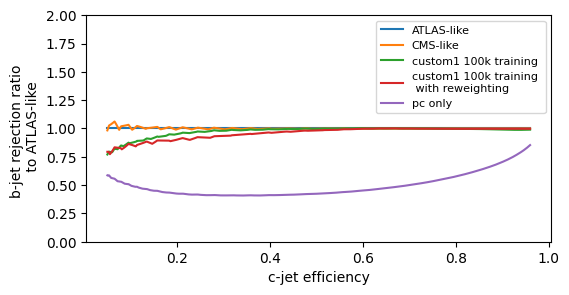

In [ ]:
### draw ratio plot
x_space = np.linspace(0.05, 0.96, 1000)
y_ATLAS, y_CMS = f_ATLAS(x_space), f_CMS(x_space)
y_1_100k, y_1_100k_rw = f_custom1_100k(x_space), f_custom1_100k_rw(x_space)
y_pc = f_pc(x_space)
plt.figure(figsize=(6,3), dpi=100)
plt.plot(x_space, y_ATLAS/y_ATLAS, label = "ATLAS-like")
plt.plot(x_space, y_CMS/y_ATLAS, label = "CMS-like")
plt.plot(x_space, y_1_100k/y_ATLAS, label = "custom1 100k training")
plt.plot(x_space, y_1_100k_rw/y_ATLAS, label = "custom1 100k training \n with reweighting")
plt.plot(x_space, y_pc/y_ATLAS, label = "pc only")

#plt.yscale("log", base = 10)
plt.ylim(0,2)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection ratio \n to ATLAS-like")
plt.legend(prop={'size': 8})
plt.show()

### Training with other hyperparameter with 100k samples


In [ ]:
#construct the model
class custom2(nn.Module):
    def __init__(self, in_dim) -> None:
        super().__init__()
        self.input = nn.Linear(in_dim, 100)
        self.layer0 = nn.Linear(100, 75)
        self.layer1 = nn.Linear(75,75)
        self.layer2 = nn.Linear(75,50)
        self.output = nn.Linear(50, 1)

    def forward(self, x):
        x = nn.ReLU()(self.input(x))
        x = nn.Tanh()(self.layer0(x))
        x = nn.RReLU()(self.layer1(x))
        x = nn.Dropout(p=0.4)(x)
        x = nn.Tanh()(self.layer2(x))
        output = nn.Sigmoid()(self.output(x))
        return output


In [ ]:
#prepare training dataset
torch.manual_seed(114514)
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=100000, random_state=893)
#X_train, y_train = X_train_full[110000:210000, :], y_train_full[110000:210000]
X_mean, X_std = np.mean(X_train, axis = 0), np.std(X_train, axis = 0)
X_train = (X_train-X_mean)/(X_std)
print(np.count_nonzero(y_train==1)/np.count_nonzero(y_train==0))

dataset_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_vali = torch.utils.data.TensorDataset(torch.from_numpy(X_vali), torch.from_numpy(y_vali))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 2 #for this prototyping NN, only use pb and pc as the input features
model2_100k = custom2(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model2_100k.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size = batch_size, shuffle = True) 

train_accu_lst2_100k, vali_accu_lst2_100k = [], []
train_loss_lst2_100k, vali_loss_lst2_100k = [], []
model2_100k.train()
for epoch in range(epochs):
    model2_100k.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model2_100k(X)
        #reconstruct criterion based on each data label
        weight = torch.clone(y)
        weight[weight[:, 0] == 0] = 0.21
        criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    #scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst2_100k.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model2_100k.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model2_100k(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model2_100k.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst2_100k.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model2_100k.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model2_100k(X)
            weight = torch.clone(y)
            weight[weight[:, 0] == 0] = 0.21
            criterion = nn.BCELoss(weight = weight)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model2_100k.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst2_100k.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst2_100k.append(vali_accu)

0.21747811583086793
device: cpu


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.14690305063944034
train accu: 0.8243780918860901
vali accu: 0.5120004017463244, vali loss: 0.24377195286203404


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.13615901200362787
train accu: 0.8227264818020771
vali accu: 0.5402822413994154, vali loss: 0.23026161397598227


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.1354740961357151
train accu: 0.8221572192509666
vali accu: 0.5587462592765295, vali loss: 0.22831957049819887


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.13517753612202452
train accu: 0.8227116113994224
vali accu: 0.5260076717758602, vali loss: 0.23995630032553963


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.13520372561786487
train accu: 0.8207837498909517
vali accu: 0.5875094473611354, vali loss: 0.22687834029903217


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.13498245076755125
train accu: 0.8230493628600956
vali accu: 0.5367073695294874, vali loss: 0.2361213003798407


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.13506520939681232
train accu: 0.8212435146431261
vali accu: 0.5809372004421409, vali loss: 0.229299752383816


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.13475232352228725
train accu: 0.8242529682588432
vali accu: 0.5129494783031836, vali loss: 0.25282804667949677


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.13490155264925774
train accu: 0.8239558178957344
vali accu: 0.52072785064462, vali loss: 0.2449523104088647


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.1347719763246034
train accu: 0.8206926465906594
vali accu: 0.5875753365180023, vali loss: 0.2307744634394743


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.1346408819870266
train accu: 0.8180401859131632
vali accu: 0.6374794236120507, vali loss: 0.2237638321001919


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.134906004380692
train accu: 0.8239973864600163
vali accu: 0.5066921371841455, vali loss: 0.254242760262319


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.13481095269360505
train accu: 0.8249896405321252
vali accu: 0.5043772108989144, vali loss: 0.2558582945137608


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.1347040686079913
train accu: 0.8226554259946914
vali accu: 0.5341112771684146, vali loss: 0.23975057709886102


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.13465923956974082
train accu: 0.82081730471528
vali accu: 0.5781543870875421, vali loss: 0.2296939354617985


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.13465264178526676
train accu: 0.8236242770619566
vali accu: 0.5104396536964982, vali loss: 0.24854866863817585


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.13458460881886886
train accu: 0.8233256621540562
vali accu: 0.5250391152993119, vali loss: 0.24089158873777


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.1346080408186254
train accu: 0.8263110704267971
vali accu: 0.5002713173944732, vali loss: 0.2678557675407857


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.1345064380132329
train accu: 0.8227505627547791
vali accu: 0.5301888806555036, vali loss: 0.23942864967548116


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.13438607319770263
train accu: 0.8231350631100092
vali accu: 0.5222964800394228, vali loss: 0.24301430400536986


In [ ]:
unit = np.array([13.2, 14.8, 9, 16, 8, 11.1, 8, 16, 16,8,16,16,13.2,16,11.1,14.8,13.2,16,14.8, 6.03*3])
pts = np.array([4,4,3, 4, 2,3,2,4, 4,2,4,4, 4,4,3, 4,4,4,4, 6.03])
print(unit[12:].shape, pts[12:].shape)
print(np.sum(unit[:])/np.sum(pts[:]))

(8,) (8,)
3.6873887443516358


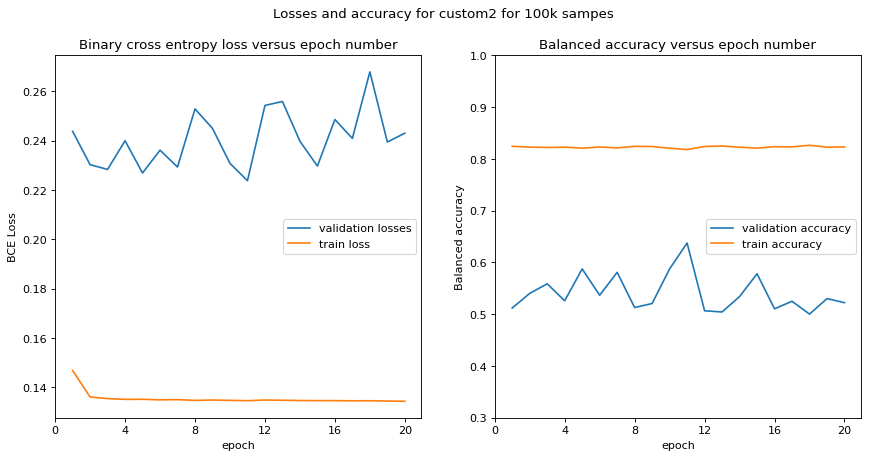

In [ ]:
#plot the loss and accuracy versus epoch
epochs = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(13,6), dpi=80)
fig.suptitle("Losses and accuracy for custom2 for 100k sampes ")
ax[0].plot(epochs, vali_loss_lst2_100k, label = "validation losses")
ax[0].plot(epochs, train_loss_lst2_100k, label = "train loss")
ax[0].set_ylabel("BCE Loss")
ax[0].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[0].set_title("Binary cross entropy loss versus epoch number")
ax[0].legend(loc=5)

ax[1].plot(epochs, vali_accu_lst2_100k, label = "validation accuracy")
ax[1].plot(epochs, train_accu_lst2_100k, label = "train accuracy")
ax[1].set_ylabel("Balanced accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_ylim(0.3, 1)
ax[1].set_xticks(np.arange(0,21,4))
ax[1].set_title("Balanced accuracy versus epoch number")
ax[1].legend(loc=5)
plt.show()

In [ ]:
#Make prediction on test set with model_10k:
_, X_test, _, y_test = train_test_split(data_X, data_y, test_size=10000000, random_state=1919810)
X_test = (X_test-X_mean)/X_std

dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred2_100k = []
with torch.no_grad():
    model2_100k.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model2_100k(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred2_100k.append(result)

pred_label2_100k = np.concatenate(pred2_100k)
print(pred_label2_100k.shape)

  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)


In [ ]:
b_CUSTOM2_100k = pred_label2_100k[pred_label2_100k[:, 1] == 0]
c_CUSTOM2_100k = pred_label2_100k[pred_label2_100k[:, 1] == 1]
b_len, c_len = b_CUSTOM2_100k.shape[0], c_CUSTOM2_100k.shape[0]
print(np.max(b_CUSTOM2_100k[:,0]), np.min(b_CUSTOM2_100k[:,0]), np.max(c_CUSTOM2_100k[:,0]), np.min(c_CUSTOM2_100k[:,0]))

thresh_CUSTOM2_100k = np.linspace(0.01, 0.95, 100)
b_eff_CUSTOM2_100k = np.array([np.count_nonzero((b_CUSTOM2_100k[:, 0] > thresh)) for thresh in thresh_CUSTOM2_100k])/b_len
c_eff_CUSTOM2_100k = np.array([np.count_nonzero((c_CUSTOM2_100k[:, 0] > thresh)) for thresh in thresh_CUSTOM2_100k])/c_len
b_rej_CUSTOM2_100k = 1/b_eff_CUSTOM2_100k

0.97519344 0.0016214635 0.9783124 0.0019688313


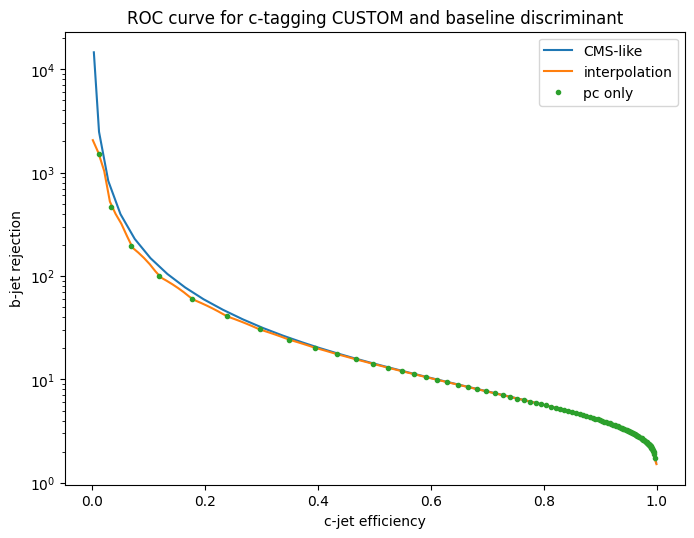

In [ ]:
f_custom2_100k = interp1d(c_eff_CUSTOM2_100k, b_rej_CUSTOM2_100k, kind = "slinear", fill_value= "extrapolate")
x_space = np.linspace(0.001, 0.9999, 100)
plt.figure(figsize=(8,6), dpi=100)

#plt.plot(c_eff_ATLAS, b_rej_ATLAS, ".", label = "ATLAS-like")
plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.plot(x_space, f_custom2_100k(x_space), label = "interpolation")
plt.plot(c_eff_CUSTOM2_100k, b_rej_CUSTOM2_100k, ".", label = "pc only")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

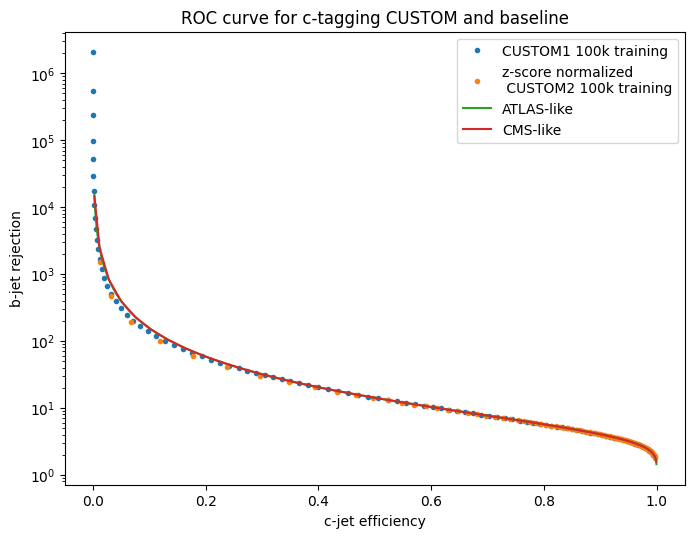

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(c_eff_CUSTOM1_100k, b_rej_CUSTOM1_100k, ".", label = "CUSTOM1 100k training")
#plt.plot(c_eff_CUSTOM1_10k, b_rej_CUSTOM1_10k, ".", label = "CUSTOM1 10k training")
plt.plot(c_eff_CUSTOM2_100k, b_rej_CUSTOM2_100k, ".", label = "z-score normalized \n CUSTOM2 100k training")
#plt.plot(c_eff_CUSTOM1w, b_rej_CUSTOM1w, label = "CUSTOM1 without reweighting")
plt.plot(c_eff_ATLAS, b_rej_ATLAS, label = "ATLAS-like")
plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline")
plt.legend()
plt.show()

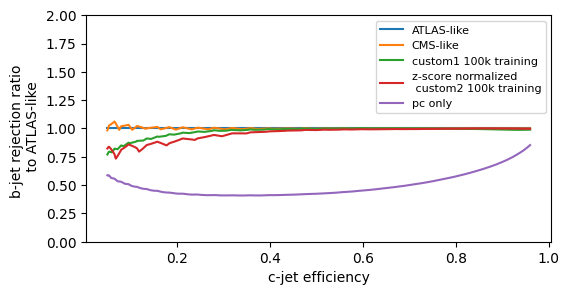

In [ ]:
### draw ratio plot
x_space = np.linspace(0.05, 0.96, 1000)
y_ATLAS, y_CMS = f_ATLAS(x_space), f_CMS(x_space)
y_2_100k = f_custom2_100k(x_space)
y_pc = f_pc(x_space)
plt.figure(figsize=(6,3), dpi=100)
plt.plot(x_space, y_ATLAS/y_ATLAS, label = "ATLAS-like")
plt.plot(x_space, y_CMS/y_ATLAS, label = "CMS-like")
plt.plot(x_space, y_1_100k/y_ATLAS, label = "custom1 100k training")
plt.plot(x_space, y_2_100k/y_ATLAS, label = "z-score normalized \n custom2 100k training")
plt.plot(x_space, y_pc/y_ATLAS, label = "pc only")

#plt.yscale("log", base = 10)
plt.ylim(0,2)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection ratio \n to ATLAS-like")
plt.legend(prop={'size': 8})
plt.show()

### Three input model

In [ ]:
b_jet_3 = (pd.read_csv("/global/cscratch1/sd/ricardom/b_jet_3output.csv")).to_numpy()
c_jet_3 = (pd.read_csv("/global/cscratch1/sd/ricardom/c_jet_3output.csv")).to_numpy()
#l_jet_3 = (pd.read_csv("/global/cscratch1/sd/ricardom/light_jet_3output.csv")).to_numpy()
data_X_3 = np.concatenate((b_jet_3, c_jet_3)) #data
#creating label for c_jet and b_jet: c -> 1, b -> 0
b_label_3 = np.zeros((b_jet.shape[0]))
c_label_3 = np.ones((c_jet.shape[0]))
#l_label_3 = 15*np.ones((l_jet_3.shape[0]))
data_y_3 = np.concatenate((b_label_3, c_label_3)) #label for data

In [ ]:
#train validation split
X_train_full_3, X_vali_3, y_train_full_3, y_vali_3 = train_test_split(data_X_3, data_y_3, test_size=50000, random_state=114514)
print(y_vali.shape)

(50000,)


In [ ]:
#construct the model
class custom3(nn.Module):
    def __init__(self, in_dim) -> None:
        super().__init__()
        self.input = nn.Linear(in_dim, 100)
        self.layer0 = nn.Linear(100, 75)
        self.layer1 = nn.Linear(75,75)
        self.layer2 = nn.Linear(75,50)
        self.output = nn.Linear(50, 1)

    def forward(self, x):
        x = nn.ReLU()(self.input(x))
        x = nn.Tanh()(self.layer0(x))
        x = nn.ReLU()(self.layer1(x))
        x = nn.Dropout(p=0.4)(x)
        x = nn.Tanh()(self.layer2(x))
        output = nn.Sigmoid()(self.output(x))
        return output


In [ ]:
#prepare training dataset
torch.manual_seed(114514)
X_train_3, y_train_3 = X_train_full_3[110000:210000, :], y_train_full_3[110000:210000]
#X_train_3[:, 2] = X_train_3[:, 1]/(X_train_3[:, 0]+X_train_3[:, 1])
X_train_3[:, 2] = X_train_3[:, 1]/((X_train_3[:, 0]) + X_train_3[:, 1])
X_3_mean, X_3_std = np.mean(X_train_3, axis = 0), np.std(X_train_3, axis = 0)
X_train_3 = (X_train_3-X_3_mean)/X_3_std

dataset_train_3 = torch.utils.data.TensorDataset(torch.from_numpy(X_train_3), torch.from_numpy(y_train_3))
dataset_vali_3 = torch.utils.data.TensorDataset(torch.from_numpy(X_vali_3), torch.from_numpy(y_vali_3))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 3 #for this prototyping NN, only use pb and pc as the input features
model3_100k = custom3(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model3_100k.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train_3 = torch.utils.data.DataLoader(dataset_train_3, batch_size = batch_size, shuffle = True)
dataloader_vali_3 = torch.utils.data.DataLoader(dataset_vali_3, batch_size = batch_size, shuffle = True) 

train_accu_lst3_100k, vali_accu_lst3_100k = [], []
train_loss_lst3_100k, vali_loss_lst3_100k = [], []
model3_100k.train()
for epoch in range(epochs):
    model3_100k.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train_3, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model3_100k(X)
        #reconstruct criterion based on each data label
        #weight = torch.clone(y)
        #weight[weight[:, 0] == 0] = 0.21
        #criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    #scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst3_100k.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model3_100k.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train_3:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model3_100k(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model3_100k.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst3_100k.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model3_100k.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali_3:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model3_100k(X)
            #weight = torch.clone(y)
            #weight[weight[:, 0] == 0] = 0.21
            #criterion = nn.BCELoss(weight = weight)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model3_100k.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst3_100k.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst3_100k.append(vali_accu)

device: cpu


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.33301549711648154
train accu: 0.7459236349331477
vali accu: 0.5, vali loss: 0.5253355927309211


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.2963478296537838
train accu: 0.7463190182754355
vali accu: 0.5, vali loss: 0.4942934061495625


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.2944059439022523
train accu: 0.7560786886123892
vali accu: 0.5, vali loss: 0.5274232697426057


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.29354639225603674
train accu: 0.7405510270995993
vali accu: 0.5, vali loss: 0.5525616115453292


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.2931229519417219
train accu: 0.75714517028734
vali accu: 0.5, vali loss: 0.5418027941973842


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.29266962858722034
train accu: 0.7675499926008472
vali accu: 0.5, vali loss: 0.5334192082589987


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.2926217969649893
train accu: 0.7857848570397907
vali accu: 0.5, vali loss: 0.520935844858082


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.29244812286418415
train accu: 0.7794238976408606
vali accu: 0.5, vali loss: 0.5354459612649314


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.2924062286496467
train accu: 0.7729419259037416
vali accu: 0.5, vali loss: 0.5629006812767107


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.29243146485227456
train accu: 0.7789822405715658
vali accu: 0.5, vali loss: 0.5129490627013907


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.29261512036823556
train accu: 0.7703046760368334
vali accu: 0.5, vali loss: 0.5320540922028678


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.29239406671060625
train accu: 0.7577189729523682
vali accu: 0.5, vali loss: 0.5127389821775106


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.2924236269939281
train accu: 0.7484483234143786
vali accu: 0.5, vali loss: 0.579657358782632


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.2923188485452891
train accu: 0.784014934770082
vali accu: 0.5, vali loss: 0.5260953606695545


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.29241670401352443
train accu: 0.7576824756584255
vali accu: 0.5, vali loss: 0.5685625061088678


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.2924129769320378
train accu: 0.7597159464229591
vali accu: 0.5, vali loss: 0.5846347399816221


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.29208178780115474
train accu: 0.7712237478340096
vali accu: 0.5, vali loss: 0.5697754577410464


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.29210312965580876
train accu: 0.779115880626249
vali accu: 0.5, vali loss: 0.5677957163781536


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.2921832306000888
train accu: 0.7696475498097225
vali accu: 0.5, vali loss: 0.5847042288099017


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.2920938541974558
train accu: 0.7767125868678126
vali accu: 0.5, vali loss: 0.5479599664710006


In [ ]:
print(X_train_3.shape)

(100000, 3)


In [ ]:
#Make prediction on test set with model_10k:
_, X_test, _, y_test = train_test_split(data_X_3, data_y_3, test_size=10000000, random_state=114514)
X_test[:, 2] = np.log(X_test[:, 1]/X_test[:, 0])
dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred3_100k = []
with torch.no_grad():
    model3_100k.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model3_100k(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred3_100k.append(result)

pred_label3_100k = np.concatenate(pred3_100k)
print(pred_label3_100k.shape)

  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)


In [ ]:
b_CUSTOM3_100k = pred_label3_100k[pred_label3_100k[:, 1] == 0]
c_CUSTOM3_100k = pred_label3_100k[pred_label3_100k[:, 1] == 1]
b_len, c_len = b_CUSTOM3_100k.shape[0], c_CUSTOM3_100k.shape[0]
print(np.max(b_CUSTOM3_100k[:,0]), np.min(b_CUSTOM3_100k[:,0]), np.max(c_CUSTOM3_100k[:,0]), np.min(c_CUSTOM3_100k[:,0]))

thresh_CUSTOM3_100k = np.linspace(0.001, 0.99, 100)
b_eff_CUSTOM3_100k = np.array([np.count_nonzero((b_CUSTOM3_100k[:, 0] > thresh)) for thresh in thresh_CUSTOM3_100k])/b_len
c_eff_CUSTOM3_100k = np.array([np.count_nonzero((c_CUSTOM3_100k[:, 0] > thresh)) for thresh in thresh_CUSTOM3_100k])/c_len
b_rej_CUSTOM3_100k = 1/b_eff_CUSTOM3_100k

0.99273646 0.00060324353 0.99440753 0.00060332374


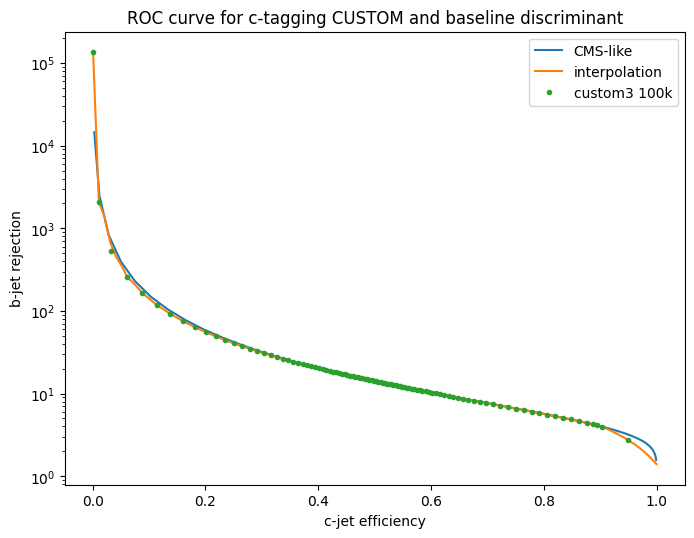

In [ ]:
f_custom3_100k = interp1d(c_eff_CUSTOM3_100k, b_rej_CUSTOM3_100k, kind = "slinear", fill_value= "extrapolate")
x_space = np.linspace(0.001, 0.9999, 100)
plt.figure(figsize=(8,6), dpi=100)

#plt.plot(c_eff_ATLAS, b_rej_ATLAS, ".", label = "ATLAS-like")
plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.plot(x_space, f_custom3_100k(x_space), label = "interpolation")
plt.plot(c_eff_CUSTOM3_100k, b_rej_CUSTOM3_100k, ".", label = "custom3 100k")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
#plt.plot(c_eff_CUSTOM1_10k, b_rej_CUSTOM1_10k, ".", label = "CUSTOM1 10k training")
#plt.plot(c_eff_CUSTOM1_10k_rw, b_rej_CUSTOM1_10k_rw, ".", label = "CUSTOM1 100k training \n with reweighting")
#plt.plot(c_eff_CUSTOM1_100k, b_rej_CUSTOM1_100k, ".", label = "CUSTOM1 100k training")
#plt.plot(c_eff_CUSTOM2_100k, b_rej_CUSTOM2_100k, ".", label = "CUSTOM2 100k training")
plt.plot(c_eff_CUSTOM3_100k, b_rej_CUSTOM3_100k, ".", label = "CUSTOM3 100k training")
#plt.plot(c_eff_pc, b_rej_pc, label = "pc only")
plt.plot(c_eff_ATLAS, b_rej_ATLAS,  label = "ATLAS-like")
plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

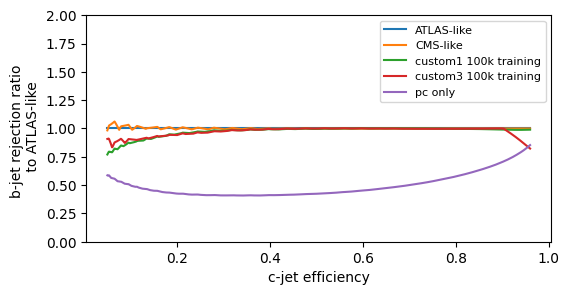

In [56]:
### draw ratio plot
x_space = np.linspace(0.05, 0.96, 1000)
y_ATLAS, y_CMS = f_ATLAS(x_space), f_CMS(x_space)
y_3_100k = f_custom3_100k(x_space)
y_pc = f_pc(x_space)
plt.figure(figsize=(6,3), dpi=100)
plt.plot(x_space, y_ATLAS/y_ATLAS, label = "ATLAS-like")
plt.plot(x_space, y_CMS/y_ATLAS, label = "CMS-like")
plt.plot(x_space, y_1_100k/y_ATLAS, label = "custom1 100k training")
plt.plot(x_space, y_3_100k/y_ATLAS, label = "custom3 100k training")
plt.plot(x_space, y_pc/y_ATLAS, label = "pc only")

#plt.yscale("log", base = 10)
plt.ylim(0,2)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection ratio \n to ATLAS-like")
plt.legend(prop={'size': 8})
plt.show()